In [9]:
# !pip install seaborn
# !pip install sklearn

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import KFold

# Part I Load data

In [3]:
def load_dataset(data):
   df = pd.read_csv(data)
   df = df.rename(columns={'class':'types'})
   return df

# Part II Summarizing the dataset

In [4]:
def summarize_dataset(df):
    shapes = df.shape
    first_lines = df.head(10)
    statitsdic_df = df.describe()
    hist = df.hist(bins=5)
    return f"its shape: {shapes}\nits 10 first lines: \n{first_lines}\n\nits statistical summary:\n{statitsdic_df}\n\nIts distribution:\n {hist}"

# Part III

In [5]:
def print_plot_univariate(df):

    sns.scatterplot(x=df.index, y=df['sepal-width'], hue=df['types']).set(title='Line plot of sepal width')

    plt.figure(figsize=(6,6))
    plt.title('Line plot of petal length')
    plt.xlabel('index', fontsize=20)
    plt.ylabel('petal length', fontsize=20)
    plt.plot(df.index, df['petal-length'], markevery=1, marker='d')
    for name, group in df.groupby('types'):
        plt.plot(group.index, group['petal-length'], label=name, markevery=1, marker='d')
    plt.legend()
    plt.show()

    sns.scatterplot(x=df.index, y=df['petal-width'], hue=df['types']).set(title='Line plot of petal width')

    plt.figure(figsize=(6,6))
    plt.title('Line plot of sepal length')
    plt.xlabel('index', fontsize=20)
    plt.ylabel('Sepal length', fontsize=20)
    plt.plot(df.index, df['sepal-length'], markevery=1, marker='d')
    for name, group in df.groupby('types'):
        plt.plot(group.index, group['sepal-length'], label=name, markevery=1, marker='d')
    plt.legend()
    plt.show()

In [6]:
def print_plot_multivariate(file_data):
    ldr1 = file_data.iloc[:, 0:1]
    ldr2 = file_data.iloc[:, 1:2]
    servo_correction = file_data.iloc[:, 2:3]

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(ldr2, ldr1, servo_correction)
    ax.set_zlabel('Delta Servo')
    plt.xlabel("LDR2")
    plt.ylabel("LDR1")
    plt.gca().invert_xaxis()
    plt.show()
    # return ldr1, ldr2, servo_correction

# Part IV

In [7]:
def my_print_and_test_models(df):

    # DecisionTree
    model1 = DecisionTreeClassifier()

    # GaussianNB
    model2 = GaussianNB()

    # KNeighbors
    model3 = KNeighborsClassifier()

    # LogisticRegression
    model4 = LogisticRegression(solver='liblinear', multi_class='ovr')

    # LinearDiscriminant
    model5 = LinearDiscriminantAnalysis()

    # SVM
    model6 = SVC(gamma='auto')

    array = df.values
    X = array[:,0:4]
    y = array[:,4]

    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=0.20, random_state=1)

    m1_cv_results = cross_val_score(model1, X_train, Y_train, cv=KFold(n_splits=2), scoring='accuracy')
    m2_cv_results = cross_val_score(model2, X_train, Y_train, cv=KFold(n_splits=2), scoring='accuracy')
    m3_cv_results = cross_val_score(model3, X_train, Y_train, cv=KFold(n_splits=2), scoring='accuracy')
    m4_cv_results = cross_val_score(model4, X_train, Y_train, cv=KFold(n_splits=2), scoring='accuracy')
    m5_cv_results = cross_val_score(model5, X_train, Y_train, cv=KFold(n_splits=2), scoring='accuracy')
    m6_cv_results = cross_val_score(model6, X_train, Y_train, cv=KFold(n_splits=2), scoring='accuracy')
    m1 , m2, m3, m4, m5, m6 = 'DecisionTree', 'GaussianNB', 'KNeighbors', 'LogisticRegression', 'LinearDiscriminant', 'SVM'
    # print('%s: %f (%f)' % (m1, m1_cv_results.mean(), m1_cv_results.std()))
    print(f"{m1}: {m1_cv_results.mean()}, ({m1_cv_results.std()})\n",
        f"{m2}: {m2_cv_results.mean()}, ({m2_cv_results.std()})\n",
        f"{m3}: {m3_cv_results.mean()}, ({m3_cv_results.std()})\n",
        f"{m4}: {m4_cv_results.mean()}, ({m4_cv_results.std()})\n",
        f"{m5}: {m5_cv_results.mean()}, ({m5_cv_results.std()})\n",
        f"{m6}: {m6_cv_results.mean()}, ({m6_cv_results.std()})")

In [10]:
data = 'data_iris/iris.csv'
df = load_dataset(data)

its shape: (150, 5)
its 10 first lines: 
   sepal-length  sepal-width  petal-length  petal-width        types
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa

its statistical summary:
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.1

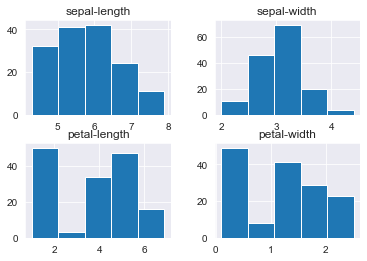

In [11]:
print(summarize_dataset(df))

its shape: (150, 5)
its 10 first lines: 
   sepal-length  sepal-width  petal-length  petal-width        types
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa

its statistical summary:
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.1

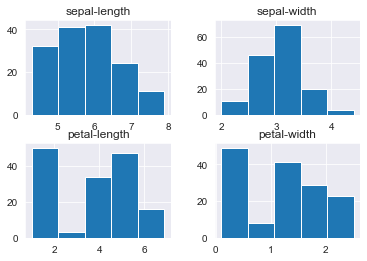

In [12]:
print(summarize_dataset(df))

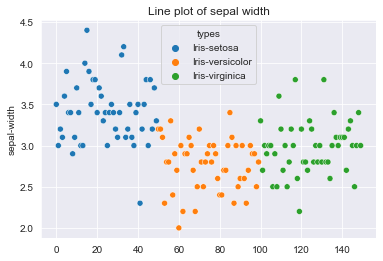

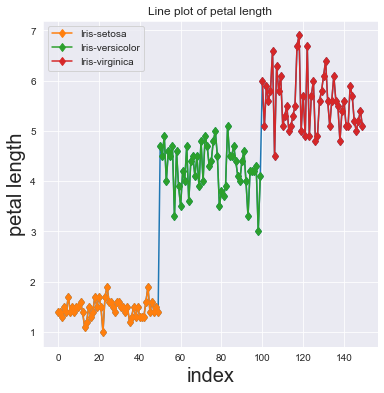

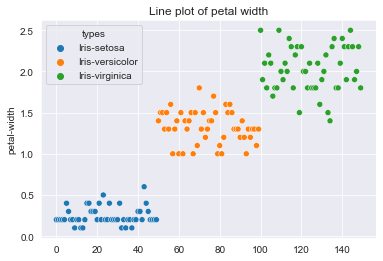

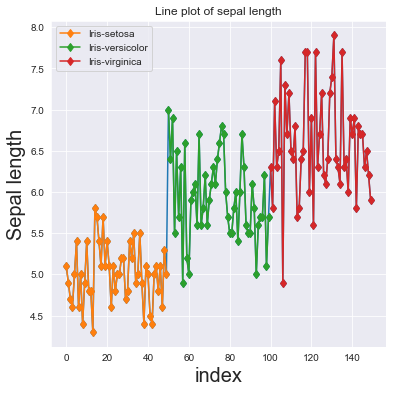

In [13]:
print_plot_univariate(df)

/var/folders/l9/c2qg53g54nb0c2fvg4pkc1sr0000gp/T/ipykernel_1136/3105416961.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


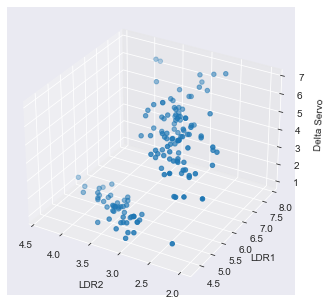

In [14]:
print_plot_multivariate(df)

In [15]:
my_print_and_test_models(df)

DecisionTree: 0.9083333333333333, (0.008333333333333304)
 GaussianNB: 0.95, (0.016666666666666663)
 KNeighbors: 0.9416666666666667, (0.025000000000000022)
 LogisticRegression: 0.8916666666666666, (0.041666666666666685)
 LinearDiscriminant: 0.975, (0.008333333333333304)
 SVM: 0.9666666666666666, (0.016666666666666663)
